In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.append("../")
import config


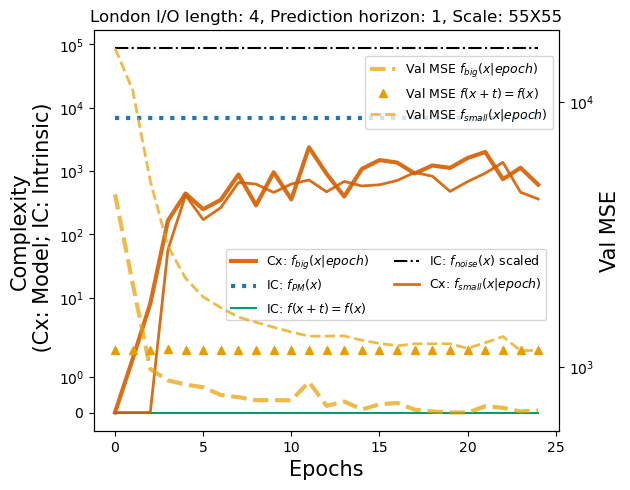

In [150]:
import matplotlib.pyplot as plt




for csr_type in ['CSR_GB_sum_y_exceeding_r_x_max']:
    for city in config.city_list_def:
        
        df = pd.read_csv("epoch_experiments_results/epoch_experiment_big_model.csv")
        df = df.fillna(df.mean())
        # print (df.head())

        x = df["epoch"].tolist()
        val_mse = df["val_loss"].tolist()
        val_non_zero_mse = df["val_non_zero_mse"].tolist()
        val_mse = df["val_loss"].tolist()
        val_mae = (df["val_loss"] ** 0.5).tolist()

        nm_non_zero = df["naive-model-non-zero"].tolist()
        nm_mse = df["naive-model-mse"].tolist()
        nm_mae = (df["naive-model-mse"] ** 0.5).tolist()
    
        cx_MP = (df[csr_type.replace("_GB_", "_MP_")]/3000).tolist()  # Run for 3K points
        cx_PM = (df[csr_type.replace("_GB_", "_PM_")]/3000).tolist()
        cx_NM = (df[csr_type.replace("_GB_", "_NM_")]/3000).tolist()
        cx_GB = (df[csr_type.replace("_GB_", "_GB_")]/3000).tolist()


        # Since GB, PM, and NM are computed only every 5 epochs using 3K points
        # For faster computation, we simply use the mean of all those values and make
        # a single horizontal line; otherwise there is a tiny jenk every 5 epochs 
        # which is confusing for the viewer. Remember that GB, PM, NM are deterministic
        # values and does not change during epochs; well GB is not deterministic
        # but is almost the same (extremely high values)
        mean_cx_PM = np.mean(cx_PM)
        cx_PM = np.random.rand(len(x))*0 + mean_cx_PM
        
        mean_cx_NM = np.mean(cx_NM)
        cx_NM = np.random.rand(len(x))*0 + mean_cx_NM        
        
        mean_cx_GB = np.mean(cx_GB)
        cx_GB = np.random.rand(len(x))*0 + mean_cx_GB        
        
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()


        
        ax1.plot(x, cx_MP, label = r"Cx: $f_{big}(x|epoch)$", alpha=0.9, color="#D55E00", linewidth=3)
        ax1.plot(x, cx_PM, ':', label = r"IC: $f_{PM}(x)$", linewidth=3)
        ax1.plot(x, cx_NM, '-', label = r"IC: $f(x+t) = f(x)$", color="#009E73")
        ax1.plot(x, cx_GB, '-.', label = r"IC: $f_{noise}(x)$ scaled", color="#000000")

        ax2.plot(x, np.array(val_mse), '--', label =  r"Val MSE $f_{big}(x|epoch)$", color="#E69F00", linewidth=3, alpha=0.7)
        ax2.plot(x, np.array(nm_mse), '^',label = r"Val MSE $f(x+t)=f(x)$", color="#E69F00")
        
        ############## Smaller model same thing
        df = pd.read_csv("epoch_experiments_results/epoch-experiment-smaller-model.csv")
        df = df.fillna(df.mean())
        # print (df.head())

        x = df["epoch"].tolist()
        val_mse = df["val_loss"].tolist()
        val_non_zero_mse = df["val_non_zero_mse"].tolist()
        val_mse = df["val_loss"].tolist()
        val_mae = (df["val_loss"] ** 0.5).tolist()

        nm_non_zero = df["naive-model-non-zero"].tolist()
        nm_mse = df["naive-model-mse"].tolist()
        nm_mae = (df["naive-model-mse"] ** 0.5).tolist()
    
        cx_MP = (df[csr_type.replace("_GB_", "_MP_")]/3000).tolist()  # Run for 3K points
        cx_PM = (df[csr_type.replace("_GB_", "_PM_")]/3000).tolist()
        cx_NM = (df[csr_type.replace("_GB_", "_NM_")]/3000).tolist()
        cx_GB = (df[csr_type.replace("_GB_", "_GB_")]/3000).tolist()

        # Since GB, PM, and NM are computed only every 5 epochs using 3K points
        # For faster computation, we simply use the mean of all those values and make
        # a single horizontal line; otherwise there is a tiny jenk every 5 epochs 
        # which is confusing for the viewer. Remember that GB, PM, NM are deterministic
        # values and does not change during epochs
        mean_cx_PM = np.mean(cx_PM)
        cx_PM = np.random.rand(len(x))*0 + mean_cx_PM
        
        mean_cx_NM = np.mean(cx_NM)
        cx_NM = np.random.rand(len(x))*0 + mean_cx_NM        
        
        mean_cx_GB = np.mean(cx_GB)
        cx_GB = np.random.rand(len(x))*0 + mean_cx_GB               

        ax1.plot(x, cx_MP, label = r"Cx: $f_{small}(x|epoch)$", alpha=0.9, color="#D55E00", linewidth=2)

        ax2.plot(x, np.array(val_mse), '--', label =  r"Val MSE $f_{small}(x|epoch)$", color="#E69F00", linewidth=2, alpha=0.7)
          

ax1.set_xlabel('Epochs', fontsize=15)
ax1.set_ylabel('Complexity\n (Cx: Model; IC: Intrinsic)', fontsize=15)
ax2.set_ylabel('Val MSE', fontsize=15)        
ax1.set_yscale("symlog")
ax2.set_yscale("symlog")

ax2.legend(fontsize=9, bbox_to_anchor=(0.5, 0.45, 0.5, 0.5)) # loc=1)
ax1.legend( fontsize=9, ncols=2,  bbox_to_anchor=(0.27, 0.26, 0.5, 0.5))

# plt.xlabel("Epochs", fontsize=15)
# plt.plot(x, val_mse, label = "val_mse")
# plt.legend(fontsize=9, bbox_to_anchor=(0.5, 0.1, 0.5, 0.5))
# plt.ylim(-1, 1*10**5)
# plt.yscale('symlog')
# plt.gca().set_aspect(3.5)
plt.tight_layout()
plt.title(city + " I/O length: 4, Prediction horizon: 1, Scale: 55X55")
plt.savefig("across_epoch.png", dpi=600)
plt.show()

            


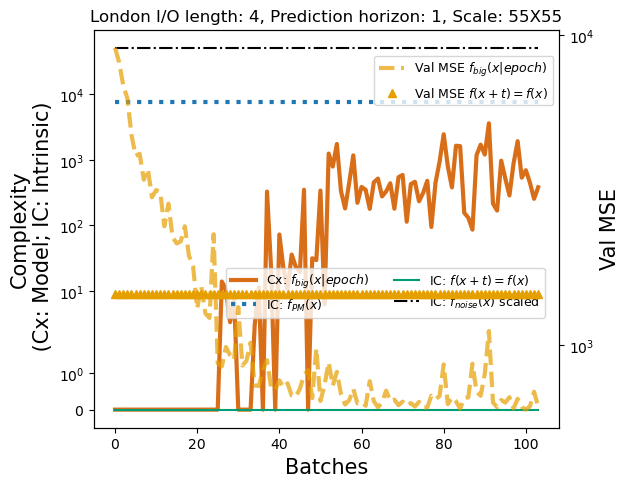

In [176]:
import matplotlib.pyplot as plt




for csr_type in ['CSR_GB_sum_y_exceeding_r_x_max']:
    for city in config.city_list_def:
        
        df = pd.read_csv("batch_experiments_results/val_csv_london-4-1-55-epoch_end.csv")
        df = df.fillna(df.mean())
        # print (df.head())

        x = df["epoch"].tolist()
        val_mse = df["val_loss"].tolist()
        val_non_zero_mse = df["val_non_zero_mse"].tolist()
        val_mse = df["val_loss"].tolist()
        val_mae = (df["val_loss"] ** 0.5).tolist()

        nm_non_zero = df["naive-model-non-zero"].tolist()
        nm_mse = df["naive-model-mse"].tolist()
        nm_mae = (df["naive-model-mse"] ** 0.5).tolist()
    
        cx_MP = (df[csr_type.replace("_GB_", "_MP_")]/200).tolist()
        cx_PM = (df[csr_type.replace("_GB_", "_PM_")]/200).tolist()
        cx_NM = (df[csr_type.replace("_GB_", "_NM_")]/200).tolist()
        cx_GB = (df[csr_type.replace("_GB_", "_GB_")]/200).tolist()


        # Since GB, PM, and NM are computed only every 5 epochs using 3K points
        # For faster computation, we simply use the mean of all those values and make
        # a single horizontal line; otherwise there is a tiny jenk every 5 epochs 
        # which is confusing for the viewer. Remember that GB, PM, NM are deterministic
        # values and does not change during epochs; well GB is not deterministic
        # but is almost the same (extremely high values)
        mean_cx_PM = np.mean(cx_PM)
        cx_PM = np.random.rand(len(x))*0 + mean_cx_PM
        
        mean_cx_NM = np.mean(cx_NM)
        cx_NM = np.random.rand(len(x))*0 + mean_cx_NM        
        
        mean_cx_GB = np.mean(cx_GB)
        cx_GB = np.random.rand(len(x))*0 + mean_cx_GB   
        
        mean_nm_mse = np.mean(nm_mse)
        nm_mse = np.random.rand(len(x))*0 + mean_nm_mse
        
        
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()


        
        ax1.plot(x, cx_MP, label = r"Cx: $f_{big}(x|epoch)$", alpha=0.9, color="#D55E00", linewidth=3)
        ax1.plot(x, cx_PM, ':', label = r"IC: $f_{PM}(x)$", linewidth=3)
        ax1.plot(x, cx_NM, '-', label = r"IC: $f(x+t) = f(x)$", color="#009E73")
        ax1.plot(x, cx_GB, '-.', label = r"IC: $f_{noise}(x)$ scaled", color="#000000")

        ax2.plot(x, np.array(val_mse), '--', label =  r"Val MSE $f_{big}(x|epoch)$", color="#E69F00", linewidth=3, alpha=0.7)
        ax2.plot(x, np.array(nm_mse), '^',label = r"Val MSE $f(x+t)=f(x)$", color="#E69F00")
        
          

ax1.set_xlabel('Batches', fontsize=15)
ax1.set_ylabel('Complexity\n (Cx: Model; IC: Intrinsic)', fontsize=15)
ax2.set_ylabel('Val MSE', fontsize=15)        
ax1.set_yscale("symlog")
ax2.set_yscale("symlog")

ax2.legend(fontsize=9, bbox_to_anchor=(0.5, 0.45, 0.5, 0.5)) # loc=1)
ax1.legend( fontsize=9, ncols=2,  bbox_to_anchor=(0.27, 0.26, 0.5, 0.5))

# plt.xlabel("Epochs", fontsize=15)
# plt.plot(x, val_mse, label = "val_mse")
# plt.legend(fontsize=9, bbox_to_anchor=(0.5, 0.1, 0.5, 0.5))
# plt.ylim(-1, 1*10**5)
# plt.yscale('symlog')
# plt.gca().set_aspect(3.5)
plt.tight_layout()
plt.title(city + " I/O length: 4, Prediction horizon: 1, Scale: 55X55")
plt.savefig("across_batches.png", dpi=600)
plt.show()

            


/var/folders/dp/q2rz500s2kj79pnbkf36h7ch0000gq/T/ipykernel_80845/252462914.py:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


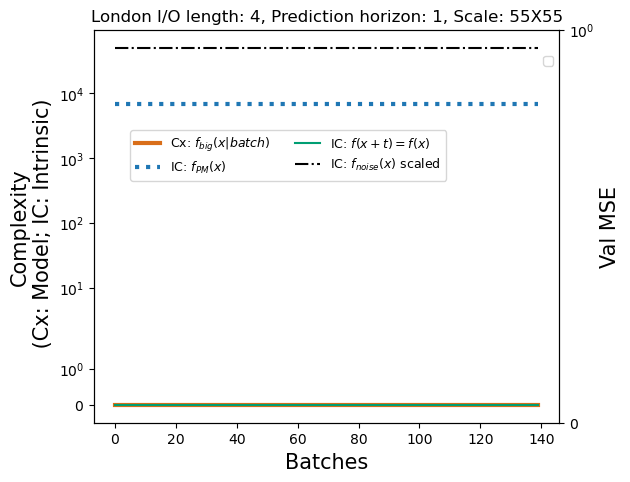

In [174]:
# When using on_epoch_begin, we don't get logs in validation_csv. Hence we need to parse :(
! grep 'for_parser:,' batch_experiments_results/batch_results_on_epoch_begin.txt | sed "s/for_parser:,//g" > temp.csv
! (echo "cityname,i_o_length,prediction_horizon,grid_size,thresh,config_cx_sample_whole_data,CSR_MP_no_thresh_mean,CSR_MP_no_thresh_median,CSR_MP_count_y_exceeding_r_x,CSR_MP_sum_y_exceeding_r_x_max,CSR_MP_sum_y_exceeding_r_x_mean,CSR_MP_sum_exp_y_exceeding_r_x_mean,CSR_MP_no_thresh_frac_mean_2,CSR_MP_no_thresh_frac_mean_2_exp,CSR_MP_no_thresh_frac_sum,CSR_PM_no_thresh_mean,CSR_PM_no_thresh_median,CSR_PM_count_y_exceeding_r_x,CSR_PM_sum_y_exceeding_r_x_max,CSR_PM_sum_y_exceeding_r_x_mean,CSR_PM_sum_exp_y_exceeding_r_x_mean,CSR_PM_no_thresh_frac_mean_2,CSR_PM_no_thresh_frac_mean_2_exp,CSR_PM_no_thresh_frac_sum,CSR_NM_no_thresh_mean,CSR_NM_no_thresh_median,CSR_NM_count_y_exceeding_r_x,CSR_NM_sum_y_exceeding_r_x_max,CSR_NM_sum_y_exceeding_r_x_mean,CSR_NM_sum_exp_y_exceeding_r_x_mean,CSR_NM_no_thresh_frac_mean_2,CSR_NM_no_thresh_frac_mean_2_exp,CSR_NM_no_thresh_frac_sum,CSR_GB_no_thresh_mean,CSR_GB_no_thresh_median,CSR_GB_count_y_exceeding_r_x,CSR_GB_sum_y_exceeding_r_x_max,CSR_GB_sum_y_exceeding_r_x_mean,CSR_GB_sum_exp_y_exceeding_r_x_mean,CSR_GB_no_thresh_frac_mean_2,CSR_GB_no_thresh_frac_mean_2_exp,CSR_GB_no_thresh_frac_sum,CSR_GB_red_by_grey_sum,CSR_NM_red_by_grey_sum,CSR_PM_red_by_grey_sum,CSR_MP_red_by_grey_sum" && cat temp.csv) > filename1 && mv filename1 across_batch.csv

import matplotlib.pyplot as plt




for csr_type in ['CSR_GB_sum_y_exceeding_r_x_max']:
    for city in config.city_list_def:
        
        df = pd.read_csv("across_batch.csv")
        df = df.fillna(df.mean())
        # print (df.head())
        
        df.reset_index(inplace=True)
        df.rename(columns={'index': 'batch'}, inplace=True)


        x = df["batch"].tolist()
        
        # No loss information in parser
        # val_mse = df["val_loss"].tolist()
        # val_non_zero_mse = df["val_non_zero_mse"].tolist()
        # # val_mse = df["val_loss"].tolist()
        # val_mae = (df["val_loss"] ** 0.5).tolist()

        # nm_non_zero = df["naive-model-non-zero"].tolist()
        # nm_mse = df["naive-model-mse"].tolist()
        # nm_mae = (df["naive-model-mse"] ** 0.5).tolist()
    
        cx_MP = (df[csr_type.replace("_GB_", "_MP_")]/200).tolist()
        cx_PM = (df[csr_type.replace("_GB_", "_PM_")]/200).tolist()
        cx_NM = (df[csr_type.replace("_GB_", "_NM_")]/200).tolist()
        cx_GB = (df[csr_type.replace("_GB_", "_GB_")]/200).tolist()


        # Since GB, PM, and NM are computed only every 5 epochs using 3K points
        # For faster computation, we simply use the mean of all those values and make
        # a single horizontal line; otherwise there is a tiny jenk every 5 epochs 
        # which is confusing for the viewer. Remember that GB, PM, NM are deterministic
        # values and does not change during epochs; well GB is not deterministic
        # but is almost the same (extremely high values)
        mean_cx_PM = np.mean(cx_PM)
        cx_PM = np.random.rand(len(x))*0 + mean_cx_PM
        
        mean_cx_NM = np.mean(cx_NM)
        cx_NM = np.random.rand(len(x))*0 + mean_cx_NM        
        
        mean_cx_GB = np.mean(cx_GB)
        cx_GB = np.random.rand(len(x))*0 + mean_cx_GB   
        
        # mean_nm_mse = np.mean(nm_mse)
        # nm_mse = np.random.rand(len(x))*0 + mean_nm_mse
        
        
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()


        
        ax1.plot(x, cx_MP, label = r"Cx: $f_{big}(x|batch)$", alpha=0.9, color="#D55E00", linewidth=3)
        ax1.plot(x, cx_PM, ':', label = r"IC: $f_{PM}(x)$", linewidth=3)
        ax1.plot(x, cx_NM, '-', label = r"IC: $f(x+t) = f(x)$", color="#009E73")
        ax1.plot(x, cx_GB, '-.', label = r"IC: $f_{noise}(x)$ scaled", color="#000000")

#         ax2.plot(x, np.array(val_mse), '--', label =  r"Val MSE $f_{big}(x|batch)$", color="#E69F00", linewidth=3, alpha=0.7)
#         ax2.plot(x, np.array(nm_mse), '^',label = r"Val MSE $f(x+t)=f(x)$", color="#E69F00")
        
          

ax1.set_xlabel('Batches', fontsize=15)
ax1.set_ylabel('Complexity\n (Cx: Model; IC: Intrinsic)', fontsize=15)
ax2.set_ylabel('Val MSE', fontsize=15)        
ax1.set_yscale("symlog")
ax2.set_yscale("symlog")

ax2.legend(fontsize=9, bbox_to_anchor=(0.5, 0.45, 0.5, 0.5)) # loc=1)
ax1.legend( fontsize=9, ncols=2,  bbox_to_anchor=(0.27, 0.26, 0.5, 0.5))

# plt.xlabel("Epochs", fontsize=15)
# plt.plot(x, val_mse, label = "val_mse")
# plt.legend(fontsize=9, bbox_to_anchor=(0.5, 0.1, 0.5, 0.5))
# plt.ylim(-1, 1*10**5)
# plt.yscale('symlog')
# plt.gca().set_aspect(3.5)
plt.tight_layout()
plt.title(city + " I/O length: 4, Prediction horizon: 1, Scale: 55X55")
plt.savefig("across_epoch.png", dpi=600)
plt.show()

            


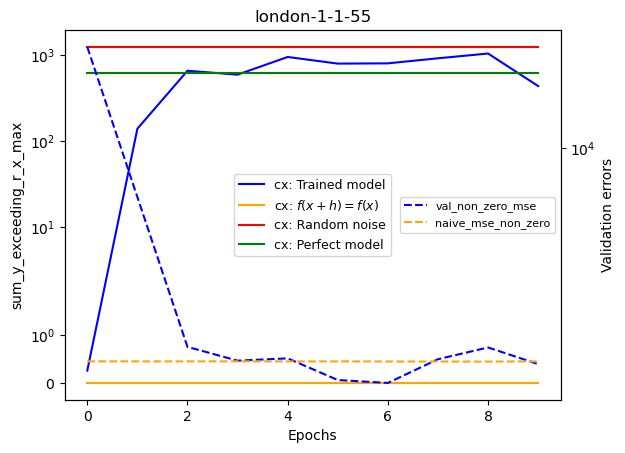

In [178]:
df = pd.read_csv("csr_epochs_3_cities/val_csv_london-1-1-55-.csv")
df = df.fillna(df.mean())
df.head()

x = df["epoch"].tolist()
val_mse = df["val_loss"].tolist()
val_non_zero_mse = df["val_non_zero_mse"].tolist()
nm_non_zero = df["naive-model-non-zero"].tolist()

cx_MP = df["CSR_MP_sum_y_exceeding_r_x_max"].tolist()
cx_PM = df["CSR_PM_sum_y_exceeding_r_x_max"].tolist()
cx_NM = df["CSR_NM_sum_y_exceeding_r_x_max"].tolist()
cx_GB = df["CSR_GB_sum_y_exceeding_r_x_max"].tolist()

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


ax1.set_xlabel('Epochs')
ax1.set_ylabel('sum_y_exceeding_r_x_max')
ax2.set_ylabel('Validation errors')


ax1.plot(x, cx_MP, label="cx: Trained model", color='blue')
ax1.plot(x, cx_NM, label=r"cx: $f(x+h) = f(x)$", color="orange")
ax1.plot(x, cx_GB, label="cx: Random noise", color="red")
ax1.plot(x, cx_PM, label="cx: Perfect model", color="green")


ax2.plot(x, val_non_zero_mse, '--', label = "val_non_zero_mse", color='blue')
# ax2.plot(x, val_mse, '--', label = "val_mse", color='blue')
ax2.plot(x, nm_non_zero, '--', label = "naive_mse_non_zero", color="orange")

# plt.legend()
# plt.ylim(0, 2000)
# plt.yscale('log')
ax1.set_yscale("symlog")
ax2.set_yscale("symlog")

ax2.legend(loc="center right", fontsize=8) # loc=1)
ax1.legend(loc="center", fontsize=9)
plt.title("london-1-1-55")
plt.savefig("london-1-1-55-epochs.png", dpi=600)
# ax1.set_ylim(0.5, 10000)
# ax2.set_ylim(1000, 10000)
plt.show()

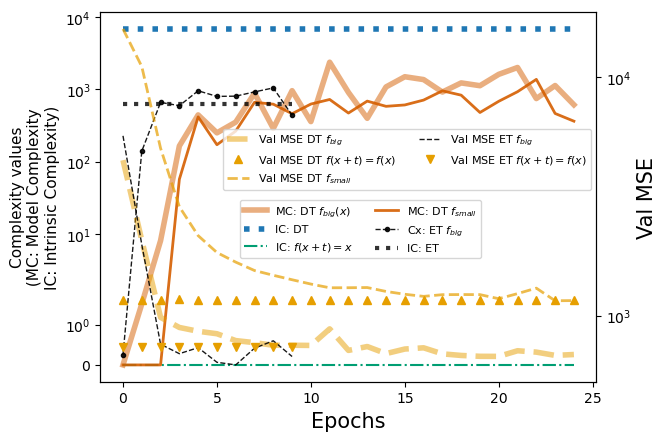

In [256]:
import matplotlib.pyplot as plt




for csr_type in ['CSR_GB_sum_y_exceeding_r_x_max']:
    for city in config.city_list_def:
        
        df = pd.read_csv("epoch_experiments_results/epoch_experiment_big_model.csv")
        df = df.fillna(df.mean())
        # print (df.head())

        x = df["epoch"].tolist()
        val_mse = df["val_loss"].tolist()
        val_non_zero_mse = df["val_non_zero_mse"].tolist()
        val_mse = df["val_loss"].tolist()
        val_mae = (df["val_loss"] ** 0.5).tolist()

        nm_non_zero = df["naive-model-non-zero"].tolist()
        nm_mse = df["naive-model-mse"].tolist()
        nm_mae = (df["naive-model-mse"] ** 0.5).tolist()
    
        cx_MP = (df[csr_type.replace("_GB_", "_MP_")]/3000).tolist()  # Run for 3K points
        cx_PM = (df[csr_type.replace("_GB_", "_PM_")]/3000).tolist()
        cx_NM = (df[csr_type.replace("_GB_", "_NM_")]/3000).tolist()
        cx_GB = (df[csr_type.replace("_GB_", "_GB_")]/3000).tolist()


        # Since GB, PM, and NM are computed only every 5 epochs using 3K points
        # For faster computation, we simply use the mean of all those values and make
        # a single horizontal line; otherwise there is a tiny jenk every 5 epochs 
        # which is confusing for the viewer. Remember that GB, PM, NM are deterministic
        # values and does not change during epochs; well GB is not deterministic
        # but is almost the same (extremely high values)
        mean_cx_PM = np.mean(cx_PM)
        cx_PM = np.random.rand(len(x))*0 + mean_cx_PM
        
        mean_cx_NM = np.mean(cx_NM)
        cx_NM = np.random.rand(len(x))*0 + mean_cx_NM        
        
        mean_cx_GB = np.mean(cx_GB)
        cx_GB = np.random.rand(len(x))*0 + mean_cx_GB        
        
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        
        
       
        ax1.plot(x, cx_MP, label = r"MC: DT $f_{big}(x)$", alpha=0.5, color="#D55E00", linewidth=4)
        ax1.plot(x, cx_PM, ':', label = r"IC: DT", linewidth=4)
        ax1.plot(x, cx_NM, '-.', label = r"IC: $f(x+t) = x$", color="#009E73")
        # ax1.plot(x, cx_GB, '-.', label = r"IC: $f_{noise}(x)$ scaled", color="#000000")

        ax2.plot(x, np.array(val_mse), '--', label =  r"Val MSE DT $f_{big}$", color="#E69F00", linewidth=4, alpha=0.5)
        ax2.plot(x, np.array(nm_mse), '^',label = r"Val MSE DT $f(x+t)=f(x)$", color="#E69F00")
        
                

                
        ############## Smaller model big task
        df = pd.read_csv("epoch_experiments_results/epoch-experiment-smaller-model.csv")
        df = df.fillna(df.mean())
        # print (df.head())

        x = df["epoch"].tolist()
        val_mse = df["val_loss"].tolist()
        val_non_zero_mse = df["val_non_zero_mse"].tolist()
        val_mse = df["val_loss"].tolist()
        val_mae = (df["val_loss"] ** 0.5).tolist()

        nm_non_zero = df["naive-model-non-zero"].tolist()
        nm_mse = df["naive-model-mse"].tolist()
        nm_mae = (df["naive-model-mse"] ** 0.5).tolist()
    
        cx_MP = (df[csr_type.replace("_GB_", "_MP_")]/3000).tolist()    # Run for 3K points
        cx_PM = (df[csr_type.replace("_GB_", "_PM_")]/3000).tolist()  
        cx_NM = (df[csr_type.replace("_GB_", "_NM_")]/3000).tolist()
        cx_GB = (df[csr_type.replace("_GB_", "_GB_")]/3000).tolist()

        # Since GB, PM, and NM are computed only every 5 epochs using 3K points
        # For faster computation, we simply use the mean of all those values and make
        # a single horizontal line; otherwise there is a tiny jenk every 5 epochs 
        # which is confusing for the viewer. Remember that GB, PM, NM are deterministic
        # values and does not change during epochs
        mean_cx_PM = np.mean(cx_PM)
        cx_PM = np.random.rand(len(x))*0 + mean_cx_PM
        
        mean_cx_NM = np.mean(cx_NM)
        cx_NM = np.random.rand(len(x))*0 + mean_cx_NM        
        
        mean_cx_GB = np.mean(cx_GB)
        cx_GB = np.random.rand(len(x))*0 + mean_cx_GB               

        ax1.plot(x, cx_MP, label = r"MC: DT $f_{small}$", alpha=0.9, color="#D55E00", linewidth=2)

        ax2.plot(x, np.array(val_mse), '--', label =  r"Val MSE DT $f_{small}$", color="#E69F00", linewidth=2, alpha=0.7)    
        
        
        ################################### BIG MODEL SMALL TASK

 
        ### Easier task same model
        df = pd.read_csv("csr_epochs_3_cities/val_csv_london-1-1-55-.csv")
        df = df.fillna(df.mean())
        df.head()

        x = df["epoch"].tolist()
        val_mse = df["val_loss"].tolist()
        val_non_zero_mse = df["val_non_zero_mse"].tolist()
        nm_non_zero = df["naive-model-non-zero"].tolist()
        nm_mse = df["naive-model-mse"].tolist()
        

        cx_MP = df["CSR_MP_sum_y_exceeding_r_x_max"].tolist()
        cx_PM = df["CSR_PM_sum_y_exceeding_r_x_max"].tolist()
        cx_NM = df["CSR_NM_sum_y_exceeding_r_x_max"].tolist()
        cx_GB = df["CSR_GB_sum_y_exceeding_r_x_max"].tolist()

        ax1.plot(x, cx_MP,'--.' , label = r"Cx: ET $f_{big}$", alpha=0.9, color="black", linewidth=1)
        ax1.plot(x, cx_PM, ':', label = r"IC: ET", linewidth=3, color="black",alpha=0.8)
        # ax1.plot(x, cx_NM, '-', label = r"IC: $f(x+t) = f(x)$", color="#009E73")
        # ax1.plot(x, cx_GB, '-.', label = r"IC: $f_{noise}(x)$ scaled", color="#000000")
        ax2.plot(x, np.array(val_mse), '--', label =  r"Val MSE ET $f_{big}$", color="black", linewidth=1, alpha=0.9)
        ax2.plot(x, np.array(nm_mse), 'v',label = r"Val MSE ET $f(x+t)=f(x)$", color="#E69F00")
                
        
    


ax1.set_xlabel('Epochs', fontsize=15)
ax1.set_ylabel('Complexity values\n (MC: Model Complexity \nIC: Intrinsic Complexity)', fontsize=11)
ax2.set_ylabel('Val MSE', fontsize=15)        
ax1.set_yscale("symlog")
ax2.set_yscale("symlog")

ax2.legend(fontsize=8, bbox_to_anchor=(0.7, 0.5, 0.3, 0.2), ncols=2) # loc=1)
ax1.legend( fontsize=8, ncols=2,  bbox_to_anchor=(0.27, 0.32, 0.5, 0.5))

# plt.xlabel("Epochs", fontsize=15)
# plt.plot(x, val_mse, label = "val_mse")
# plt.legend(fontsize=9, bbox_to_anchor=(0.5, 0.1, 0.5, 0.5))
# plt.ylim(-1, 1*10**5)
# plt.yscale('symlog')
# plt.gca().set_aspect(1.8)
# plt.tight_layout()
# plt.title(city + " I/O length: 4, Prediction horizon: 1, Scale: 55X55")
plt.savefig("across_epoch.png", dpi=400, bbox_inches='tight')
plt.show()

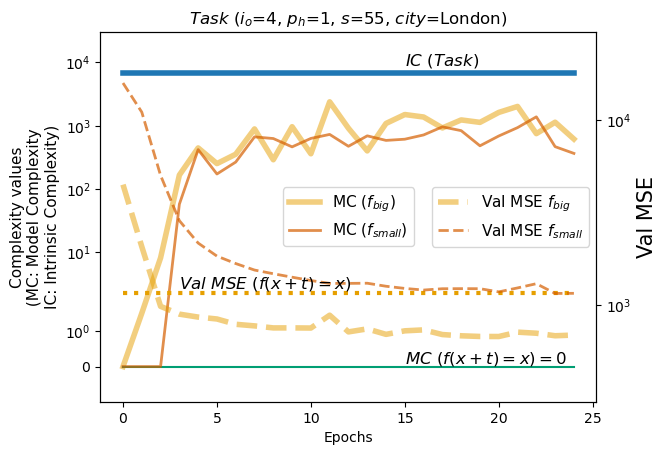

In [363]:
import matplotlib.pyplot as plt




for csr_type in ['CSR_GB_sum_y_exceeding_r_x_max']:
    for city in config.city_list_def:
        
        df = pd.read_csv("epoch_experiments_results/epoch_experiment_big_model.csv")
        df = df.fillna(df.mean())
        # print (df.head())

        x = df["epoch"].tolist()
        val_mse = df["val_loss"].tolist()
        val_non_zero_mse = df["val_non_zero_mse"].tolist()
        val_mse = df["val_loss"].tolist()
        val_mae = (df["val_loss"] ** 0.5).tolist()

        nm_non_zero = df["naive-model-non-zero"].tolist()
        nm_mse = df["naive-model-mse"].tolist()
        nm_mae = (df["naive-model-mse"] ** 0.5).tolist()
    
        cx_MP = (df[csr_type.replace("_GB_", "_MP_")]/3000).tolist()  # Run for 3K points
        cx_PM = (df[csr_type.replace("_GB_", "_PM_")]/3000).tolist()
        cx_NM = (df[csr_type.replace("_GB_", "_NM_")]/3000).tolist()
        cx_GB = (df[csr_type.replace("_GB_", "_GB_")]/3000).tolist()


        # Since GB, PM, and NM are computed only every 5 epochs using 3K points
        # For faster computation, we simply use the mean of all those values and make
        # a single horizontal line; otherwise there is a tiny jenk every 5 epochs 
        # which is confusing for the viewer. Remember that GB, PM, NM are deterministic
        # values and does not change during epochs; well GB is not deterministic
        # but is almost the same (extremely high values)
        mean_cx_PM = np.mean(cx_PM)
        cx_PM = np.random.rand(len(x))*0 + mean_cx_PM
        
        mean_cx_NM = np.mean(cx_NM)
        cx_NM = np.random.rand(len(x))*0 + mean_cx_NM        
        
        mean_cx_GB = np.mean(cx_GB)
        cx_GB = np.random.rand(len(x))*0 + mean_cx_GB        
        
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        
        
       
        ax1.plot(x, cx_MP, label = r"MC ($f_{big}$)", alpha=0.5, color="#E69F00", linewidth=4)
        # ax1.plot(x, cx_PM, '-.', label = r"IC (Task)", linewidth=4)
        ax1.plot(x, cx_PM,  linewidth=4)        
        # ax1.plot(x, cx_NM, '-.', label = r"MC ($f(x+t) = x$)", color="#009E73")
        ax1.plot(x, cx_NM, color="#009E73")

        # ax1.plot(x, cx_GB, '-.', label = r"IC: $f_{noise}(x)$ scaled", color="#000000")

        ax2.plot(x, np.array(val_mse), '--', label =  r"Val MSE $f_{big}$", color="#E69F00", linewidth=4, alpha=0.5)
        # ax2.plot(x, [np.mean(nm_mse)] * len(x), label = r"Val MSE $f(x+t)=x$", color="#E69F00")
        ax2.plot(x, [np.mean(nm_mse)] * len(x), ':', color="#E69F00", linewidth=3)

                

                
        ############## Smaller model big task
        df = pd.read_csv("epoch_experiments_results/epoch-experiment-smaller-model.csv")
        df = df.fillna(df.mean())
        # print (df.head())

        x = df["epoch"].tolist()
        val_mse = df["val_loss"].tolist()
        val_non_zero_mse = df["val_non_zero_mse"].tolist()
        val_mse = df["val_loss"].tolist()
        val_mae = (df["val_loss"] ** 0.5).tolist()

        nm_non_zero = df["naive-model-non-zero"].tolist()
        nm_mse = df["naive-model-mse"].tolist()
        nm_mae = (df["naive-model-mse"] ** 0.5).tolist()
    
        cx_MP = (df[csr_type.replace("_GB_", "_MP_")]/3000).tolist()    # Run for 3K points
        cx_PM = (df[csr_type.replace("_GB_", "_PM_")]/3000).tolist()  
        cx_NM = (df[csr_type.replace("_GB_", "_NM_")]/3000).tolist()
        cx_GB = (df[csr_type.replace("_GB_", "_GB_")]/3000).tolist()

        # Since GB, PM, and NM are computed only every 5 epochs using 3K points
        # For faster computation, we simply use the mean of all those values and make
        # a single horizontal line; otherwise there is a tiny jenk every 5 epochs 
        # which is confusing for the viewer. Remember that GB, PM, NM are deterministic
        # values and does not change during epochs
        mean_cx_PM = np.mean(cx_PM)
        cx_PM = np.random.rand(len(x))*0 + mean_cx_PM
        
        mean_cx_NM = np.mean(cx_NM)
        cx_NM = np.random.rand(len(x))*0 + mean_cx_NM        
        
        mean_cx_GB = np.mean(cx_GB)
        cx_GB = np.random.rand(len(x))*0 + mean_cx_GB               

        ax1.plot(x, cx_MP, label = r"MC ($f_{small})$", alpha=0.7, color="#D55E00", linewidth=2)

        ax2.plot(x, np.array(val_mse), '--', label =  r"Val MSE $f_{small}$", color="#D55E00", linewidth=2, alpha=0.7)    
        
        
        ################################### BIG MODEL SMALL TASK

 
         # Easier task same model
#         df = pd.read_csv("csr_epochs_3_cities/val_csv_london-1-1-55-.csv")
#         df = df.fillna(df.mean())
#         df.head()

#         x = df["epoch"].tolist()
#         val_mse = df["val_loss"].tolist()
#         val_non_zero_mse = df["val_non_zero_mse"].tolist()
#         nm_non_zero = df["naive-model-non-zero"].tolist()
#         nm_mse = df["naive-model-mse"].tolist()
        

#         cx_MP = df["CSR_MP_sum_y_exceeding_r_x_max"].tolist()
#         cx_PM = df["CSR_PM_sum_y_exceeding_r_x_max"].tolist()
#         cx_NM = df["CSR_NM_sum_y_exceeding_r_x_max"].tolist()
#         cx_GB = df["CSR_GB_sum_y_exceeding_r_x_max"].tolist()

#         ax1.plot(x, cx_MP,'--.' , label = r"Cx: ET $f_{big}$", alpha=0.9, color="black", linewidth=1)
#         ax1.plot(range(24), [cx_PM]*24, ':', label = r"IC: ET", linewidth=3, color="black",alpha=0.8)
#         # ax1.plot(x, cx_NM, '-', label = r"IC: $f(x+t) = f(x)$", color="#009E73")
#         # ax1.plot(x, cx_GB, '-.', label = r"IC: $f_{noise}(x)$ scaled", color="#000000")
#         ax2.plot(x, np.array(val_mse), '--', label =  r"Val MSE ET $f_{big}$", color="black", linewidth=1, alpha=0.9)
#         ax2.plot(x, np.array(nm_mse), 'v',label = r"Val MSE ET $f(x+t)=f(x)$", color="#E69F00")
                
        
    


ax1.set_xlabel('Epochs', fontsize=10)
ax1.set_ylabel('Complexity values\n (MC: Model Complexity \nIC: Intrinsic Complexity)', fontsize=11)
ax2.set_ylabel('Val MSE', fontsize=15)        
ax1.set_yscale("symlog")
ax2.set_yscale("symlog")


ax2.legend(fontsize=11, loc="center right")
ax1.legend(fontsize=11, loc="center")

# ax2.legend(fontsize=8, bbox_to_anchor=(0.7, 0.5, 0.3, 0.2), ncols=2) # loc=1)
# ax1.legend( fontsize=8, ncols=2,  bbox_to_anchor=(0.27, 0.32, 0.5, 0.5))
ax1.set_ylim(-1, 3*10000)
ax2.set_ylim(300, 3*10000)

ax1.text(15, cx_PM[0] * 1.297, r"$IC~(Task)$", fontsize=12)
ax1.text(15, cx_NM[0] + 0.1, r"$MC~(f(x+t) = x) = 0$", fontsize=12)
ax2.text(3, np.mean(nm_mse) + 65, r"$Val~MSE~(f(x+t) = x)$", fontsize=12)


# plt.xlabel("Epochs", fontsize=15)
# plt.plot(x, val_mse, label = "val_mse")
# plt.legend(fontsize=9, bbox_to_anchor=(0.5, 0.1, 0.5, 0.5))
# plt.ylim(-1, 1*10**5)
# plt.yscale('symlog')
# plt.gca().set_aspect(1.8)
# plt.tight_layout()
plt.title(r"$Task$ ($i_o$=4, $p_h$=1, $s$=55, $city$=London)")
plt.savefig("across_epoch_hard_task.png", dpi=400, bbox_inches='tight')
plt.show()

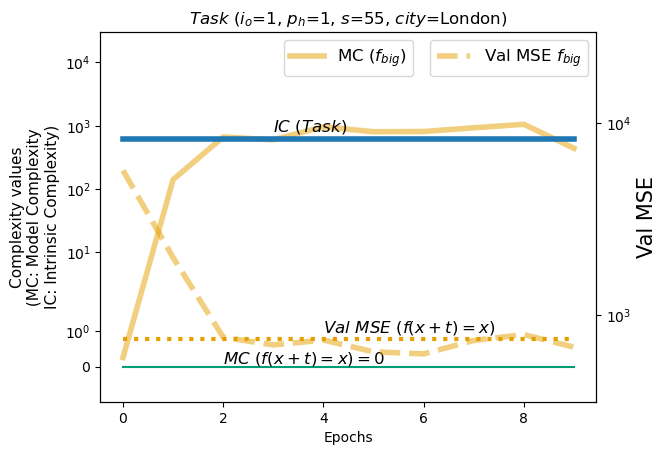

In [374]:
import matplotlib.pyplot as plt




for csr_type in ['CSR_GB_sum_y_exceeding_r_x_max']:
    for city in config.city_list_def:
        
        df = pd.read_csv("epoch_experiments_results/epoch_experiment_big_model.csv")
        df = df.fillna(df.mean())
        # print (df.head())

        x = df["epoch"].tolist()
        val_mse = df["val_loss"].tolist()
        val_non_zero_mse = df["val_non_zero_mse"].tolist()
        val_mse = df["val_loss"].tolist()
        val_mae = (df["val_loss"] ** 0.5).tolist()

        nm_non_zero = df["naive-model-non-zero"].tolist()
        nm_mse = df["naive-model-mse"].tolist()
        nm_mae = (df["naive-model-mse"] ** 0.5).tolist()
    
        cx_MP = (df[csr_type.replace("_GB_", "_MP_")]/3000).tolist()  # Run for 3K points
        cx_PM = (df[csr_type.replace("_GB_", "_PM_")]/3000).tolist()
        cx_NM = (df[csr_type.replace("_GB_", "_NM_")]/3000).tolist()
        cx_GB = (df[csr_type.replace("_GB_", "_GB_")]/3000).tolist()


        # Since GB, PM, and NM are computed only every 5 epochs using 3K points
        # For faster computation, we simply use the mean of all those values and make
        # a single horizontal line; otherwise there is a tiny jenk every 5 epochs 
        # which is confusing for the viewer. Remember that GB, PM, NM are deterministic
        # values and does not change during epochs; well GB is not deterministic
        # but is almost the same (extremely high values)
        mean_cx_PM = np.mean(cx_PM)
        cx_PM = np.random.rand(len(x))*0 + mean_cx_PM
        
        mean_cx_NM = np.mean(cx_NM)
        cx_NM = np.random.rand(len(x))*0 + mean_cx_NM        
        
        mean_cx_GB = np.mean(cx_GB)
        cx_GB = np.random.rand(len(x))*0 + mean_cx_GB        
        
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        
        
       
#         ax1.plot(x, cx_MP, label = r"MC ($f_{big}$)", alpha=0.5, color="#E69F00", linewidth=4)
#         # ax1.plot(x, cx_PM, '-.', label = r"IC (Task)", linewidth=4)
#         ax1.plot(x, cx_PM,  linewidth=4)        
#         # ax1.plot(x, cx_NM, '-.', label = r"MC ($f(x+t) = x$)", color="#009E73")
#         ax1.plot(x, cx_NM, color="#009E73")

#         # ax1.plot(x, cx_GB, '-.', label = r"IC: $f_{noise}(x)$ scaled", color="#000000")

#         ax2.plot(x, np.array(val_mse), '--', label =  r"Val MSE $f_{big}$", color="#E69F00", linewidth=4, alpha=0.5)
#         # ax2.plot(x, [np.mean(nm_mse)] * len(x), label = r"Val MSE $f(x+t)=x$", color="#E69F00")
#         ax2.plot(x, [np.mean(nm_mse)] * len(x), ':', color="#E69F00", linewidth=3)

                

                
        ############## Big model small task
        df = pd.read_csv("csr_epochs_3_cities/val_csv_london-1-1-55-.csv")
        df = pd.read_csv("csr_epochs_3_cities/val_csv_london-1-1-55-.csv")
        df = df.fillna(df.mean())
        df.head()

        x = df["epoch"].tolist()
        val_mse = df["val_loss"].tolist()
        val_non_zero_mse = df["val_non_zero_mse"].tolist()
        nm_non_zero = df["naive-model-non-zero"].tolist()
        nm_mse = df["naive-model-mse"].tolist()
        

        cx_MP = df["CSR_MP_sum_y_exceeding_r_x_max"].tolist()
        cx_PM = df["CSR_PM_sum_y_exceeding_r_x_max"].tolist()
        cx_NM = df["CSR_NM_sum_y_exceeding_r_x_max"].tolist()
        cx_GB = df["CSR_GB_sum_y_exceeding_r_x_max"].tolist()

        ax1.plot(x, cx_MP, label = r"MC ($f_{big}$)", alpha=0.5, color="#E69F00", linewidth=4)
        ax1.plot(x, cx_PM,  linewidth=4)        
        ax1.plot(x, cx_NM, color="#009E73")
        # ax1.plot(x, cx_GB, '-.', label = r"IC: $f_{noise}(x)$ scaled", color="#000000")
        ax2.plot(x, np.array(val_mse), '--', label =  r"Val MSE $f_{big}$", color="#E69F00", linewidth=4, alpha=0.5)
        ax2.plot(x, [np.mean(nm_mse)] * len(x), ':', color="#E69F00", linewidth=3)
                

    


ax1.set_xlabel('Epochs', fontsize=10)
ax1.set_ylabel('Complexity values\n (MC: Model Complexity \nIC: Intrinsic Complexity)', fontsize=11)
ax2.set_ylabel('Val MSE', fontsize=15)        
ax1.set_yscale("symlog")
ax2.set_yscale("symlog")

# ax2.legend(fontsize=15, bbox_to_anchor=(0.7, 0.5, 0.3, 0.2), ncols=2) # loc=1)
# ax1.legend( fontsize=15, ncols=2,  bbox_to_anchor=(0.27, 0.32, 0.5, 0.5))

ax2.legend(fontsize=12, loc="upper right")
ax1.legend(fontsize=12, loc="upper center")

ax1.set_ylim(-1, 3*10000)
ax2.set_ylim(350, 3*10000)
ax1.text(3, cx_PM[0] * 1.297, r"$IC~(Task)$", fontsize=12)
ax1.text(2, cx_NM[0] + 0.1, r"$MC~(f(x+t) = x) = 0$", fontsize=12)
ax2.text(4, np.mean(nm_mse) + 65, r"$Val~MSE~(f(x+t) = x)$", fontsize=12)

# plt.xlim(0,30)
# plt.xlabel("Epochs", fontsize=15)
# plt.plot(x, val_mse, label = "val_mse")
# plt.legend(fontsize=9, bbox_to_anchor=(0.5, 0.1, 0.5, 0.5))
# plt.ylim(-1, 1*10**5)
# plt.yscale('symlog')
# plt.gca().set_aspect(0.2)
# plt.tight_layout()
plt.title(r"$Task$ ($i_o$=1, $p_h$=1, $s$=55, $city$=London)")
plt.savefig("across_epoch_easy_task.png", dpi=400, bbox_inches='tight')
plt.show()